[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
[ 7.   9.  13.  17.5 18. ]


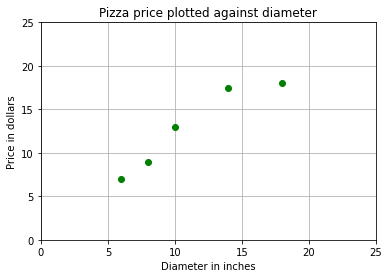

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
PSize=[6,8,10,14,18]
PSize=np.array(PSize).reshape(-1,1)
PPrice =[7,9,13,17.5,18]
PPrice=np.array(PPrice)

print(PSize)
print(PPrice)
plt.figure()
plt.title("Pizza price plotted against diameter")
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(PSize,PPrice,'go')
plt.axis([0,25,0,25])

plt.grid(True)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


[7.50347999]


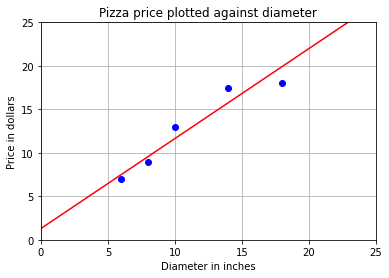

In [2]:
from sklearn.linear_model import SGDRegressor

model=SGDRegressor(loss='squared_loss',max_iter=1000)

model.fit(PSize,PPrice)
plt.figure()
plt.title("Pizza price plotted against diameter")
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')

plt.plot(PSize,PPrice,'bo')
plt.plot([0,25],[model.predict([[0]]),model.predict([[25]])],color='r')
plt.axis([0,25,0,25])
print(model.predict([[6]]))
plt.grid(True)

In [3]:
model.score(PSize,PPrice)

0.9068109779701206

In [4]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(PPrice,model.predict(PSize),multioutput='uniform_average')

print("MSE: ",mse)

MSE:  1.811594588260857


Polynomial Regression

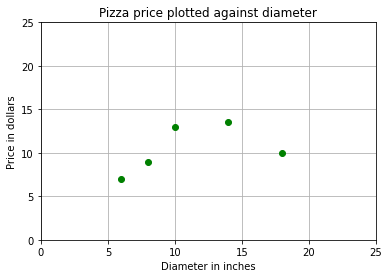

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

PSize=[[6],[8],[10],[14],[18]]
PPrice =[[7],[9],[13],[13.5],[10]]

plt.figure()
plt.title("Pizza price plotted against diameter")
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(PSize,PPrice,'go')
plt.axis([0,25,0,25])

plt.grid(True)

In [6]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly=PolynomialFeatures(degree=3)


coef=poly.fit_transform(PSize)

In [7]:
print(coef)

[[1.000e+00 6.000e+00 3.600e+01 2.160e+02]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.400e+01 1.960e+02 2.744e+03]
 [1.000e+00 1.800e+01 3.240e+02 5.832e+03]]


In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(coef,PPrice)

print(model.predict(poly.fit_transform([[18]])))

[[9.94642857]]


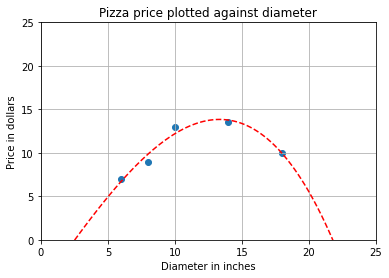

In [9]:
a=np.linspace(0,25,100)

a_quad=poly.transform(a.reshape(a.shape[0],1))
plt.title("Pizza price plotted against diameter")
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0,25,0,25])
plt.grid(True)
plt.plot(a,model.predict(a_quad),color='r',linestyle='--')
plt.scatter(PSize,PPrice)
plt.show()


In [13]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(PPrice,model.predict(a_quad),multioutput='uniform_average')

print("MSE: ",mse)

ValueError: Found input variables with inconsistent numbers of samples: [5, 100]